In [1]:
## Exploring algorithms for UFC project
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV , Lasso , LassoCV 

In [2]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p = p+'UFCDiffdata.csv'


df = pd.read_csv(p)
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.shape)
df.head(3)

(7780, 89)


,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,Result
0,0.0,0.000000,0.200000,-0.010000,0.000000,-0.380000,1.000000,0.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,Loss
1,0.0,-0.960938,-0.238047,-0.092422,0.007031,0.134766,0.007812,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Loss
2,-0.5,0.625000,0.071250,0.031250,0.162500,-0.343750,-0.875000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,Win


In [3]:
df['weight_class_WomenStrawweight'].value_counts()

0    7520
1     260
Name: weight_class_WomenStrawweight, dtype: int64

In [4]:
# removing rows that contain NaN
df.dropna(inplace=True)
print(df.shape)
df.head(3)
print(df.isnull().sum().sum())

(7780, 89)
0


In [5]:
# test train split
(df_train,df_test) = train_test_split(df, train_size = 0.8)

X_train = df_train.drop('Result',axis=1)
y_train = df_train.Result

X_test = df_test.drop('Result',axis=1)
y_test = df_test.Result

X = X_train
y = y_train

print(X.isnull().sum().sum())

0


In [6]:
X_train.head(3)

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch
5582,-0.09375,0.0,0.022656,0.004531,-0.0075,0.342187,-0.46875,-0.234375,0.375,-0.15625,...,0,0,0,1,0,0,0,1,0,0
6430,0.00000,0.0,0.175000,0.410000,0.5000,0.000000,0.00000,0.000000,0.000,0.00000,...,0,0,0,1,0,0,0,0,1,0
1448,-1.00000,0.0,-0.125000,0.017500,0.6775,0.875000,-2.00000,-0.750000,0.000,0.00000,...,0,0,0,0,1,0,0,1,0,0


In [7]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [8]:
# one hot encode
X_cat = pd.get_dummies(X_cat)
print(X_cat['title_bout'].value_counts())
X_cat.head(3)


False    5813
True      411
Name: title_bout, dtype: int64


,title_bout
5582,False
6430,False
1448,False


In [9]:
# finding columns that are all zeros from X_num
cols = pd.Series(X_num.columns)
for i in range(len(cols)):
    if (X_num.iloc[:,i] == 0).all():
        print(cols[i])

In [10]:
# removing columns of zeros
#X_num = X_num.drop(['B_draw', 'R_draw'], axis=1)

In [11]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [12]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)

In [13]:
X.head()

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
5582,-0.093750,0.00,0.022656,0.004531,-0.007500,0.342187,-0.468750,-0.234375,0.375000,-0.15625,...,0,0,1,0,0,0,1,0,0,False
6430,0.000000,0.00,0.175000,0.410000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0,0,1,0,0,0,0,1,0,False
1448,-1.000000,0.00,-0.125000,0.017500,0.677500,0.875000,-2.000000,-0.750000,0.000000,0.00000,...,0,0,0,1,0,0,1,0,0,False
3830,-0.009766,0.00,-0.030430,0.033066,-0.171875,-0.205000,0.000000,-0.253906,-0.001953,0.00000,...,1,0,1,0,0,0,1,0,0,False
2955,0.000000,-0.25,-0.027266,-0.302656,0.185391,-0.156250,0.078125,0.031250,0.000000,0.12500,...,0,0,1,0,0,0,1,0,0,False


In [14]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X,y)

C:\Users\cruseer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [15]:
# Training score
print('Training R2:',logr.score(X,y).round(2))

Training R2: 0.61


## Finding Test Error

In [16]:
X_train = X
y_train = y

In [17]:
X = X_test
y = y_test

In [18]:
# split features into numerical and categorical
X_num = X.select_dtypes(include='number')
X_cat = X.select_dtypes(exclude='number')

In [19]:
# one hot encode
X_cat = pd.get_dummies(X_cat)

In [20]:
# standardize
#X_num = (X_num - X_num.mean())/X_num.std()

In [21]:
# put back together
X = pd.concat([X_num,X_cat], axis=1)
X.head()

,DIFF_avg_KD,DIFF_avg_opp_KD,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_TD_pct,DIFF_avg_opp_TD_pct,DIFF_avg_SUB_ATT,DIFF_avg_opp_SUB_ATT,DIFF_avg_REV,DIFF_avg_opp_REV,...,weight_class_WomenStrawweight,Fighters_Stance_Open Stance,Fighters_Stance_Orthodox,Fighters_Stance_Southpaw,Fighters_Stance_Switch,Opponent_Stance_Open Stance,Opponent_Stance_Orthodox,Opponent_Stance_Southpaw,Opponent_Stance_Switch,title_bout
3511,0.750000,0.000000,-0.090000,-0.068750,-0.106250,0.190000,0.000000,-0.375000,-0.125000,-0.125000,...,0,0,0,1,0,0,1,0,0,False
3374,-1.000000,0.000000,-0.287500,0.042500,0.000000,0.200000,0.000000,1.000000,0.000000,0.000000,...,0,0,1,0,0,0,1,0,0,False
2192,-0.375977,0.000000,0.090939,0.079148,-0.268373,0.279897,0.465332,-0.583252,-0.000610,1.242065,...,0,0,0,1,0,0,0,1,0,False
4907,0.000000,0.000000,-0.112500,-0.027500,0.000000,0.125000,0.250000,1.000000,0.250000,0.250000,...,0,0,1,0,0,0,1,0,0,False
437,-0.859375,-0.492188,-0.136172,-0.124297,-0.331094,-0.085938,-1.453125,0.500000,0.140625,0.140625,...,0,0,1,0,0,0,0,1,0,False


In [22]:
# logistic regression
logr = LogisticRegression(random_state=0, max_iter=1000)
logr.fit(X_train,y_train)

C:\Users\cruseer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=0)

In [23]:
# Test score
print('Test R2:',logr.score(X,y).round(2))

Test R2: 0.6


## Feature Selection

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
X_test = X
y_test = y

In [26]:
# LASSO to find insignificant features to drop
grid = {'C':[0.01, 0.1, 1, 10, 100]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=grid,n_jobs=-1)
gs_model.fit(X_train, y_train)
# TAKES ROUGHLY 6 MINUTES TO RUN!!!

KeyboardInterrupt: 

In [ ]:
gs_model.best_params_.get('C')

In [27]:
# Train a LR model with best parameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [28]:
# viewing coefficients after LASSO
print(model.classes_)
coef = model.coef_[2]
coef

['Draw' 'Loss' 'Win']


array([ 0.05576058,  0.        ,  0.13733531, -0.10810559,  0.        ,
       -0.20114719,  0.06057033,  0.        , -0.14696196,  0.        ,
        0.0305248 , -0.02970593, -0.00308658,  0.        , -0.04208758,
        0.04093423,  0.00896185, -0.00988369,  0.05843662,  0.04315074,
        0.06193763,  0.04547548,  0.00883093, -0.00024906, -0.00376931,
        0.00270518,  0.        ,  0.        ,  0.01962152, -0.01950088,
        0.03964983, -0.03530943, -0.00386154,  0.        ,  0.        ,
        0.        , -0.00391618,  0.        ,  0.01382657, -0.02390777,
       -0.01588373,  0.01364396,  0.02312296, -0.02313019,  0.00793189,
       -0.01003628, -0.0007266 , -0.00174651,  0.00066379,  0.01104339,
        0.02436201,  0.01447437,  0.        ,  0.03166737, -0.00413409,
       -0.04695922, -0.0402488 , -0.15150771,  0.00777908,  0.        ,
        0.0303792 ,  0.        , -0.01287432,  0.01862441,  0.00990336,
       -0.06095894,  0.        ,  0.        ,  0.        ,  0.  

In [29]:
# storing coefficients and feature name in data frame
coef_df = pd.DataFrame()
coef_df['features'] = X_train.columns
coef_df['coefficient'] = coef
print(coef_df.shape)
print(coef_df.iloc[0,1])
coef_df.head()

(88, 2)
0.055760575061177355


,features,coefficient
0,DIFF_avg_KD,0.055761
1,DIFF_avg_opp_KD,0.000000
2,DIFF_avg_SIG_STR_pct,0.137335
3,DIFF_avg_opp_SIG_STR_pct,-0.108106
4,DIFF_avg_TD_pct,0.000000


In [30]:
# remove features with zero coefficients
coef_df = coef_df[coef_df['coefficient'] != 0]
coef_df = coef_df.sort_values(by=['coefficient'],ascending=False)

print(coef_df.shape)
coef_df.head()

(55, 2)


,features,coefficient
2,DIFF_avg_SIG_STR_pct,0.137335
20,DIFF_avg_opp_TD_att,0.061938
6,DIFF_avg_SUB_ATT,0.060570
18,DIFF_avg_TD_att,0.058437
0,DIFF_avg_KD,0.055761


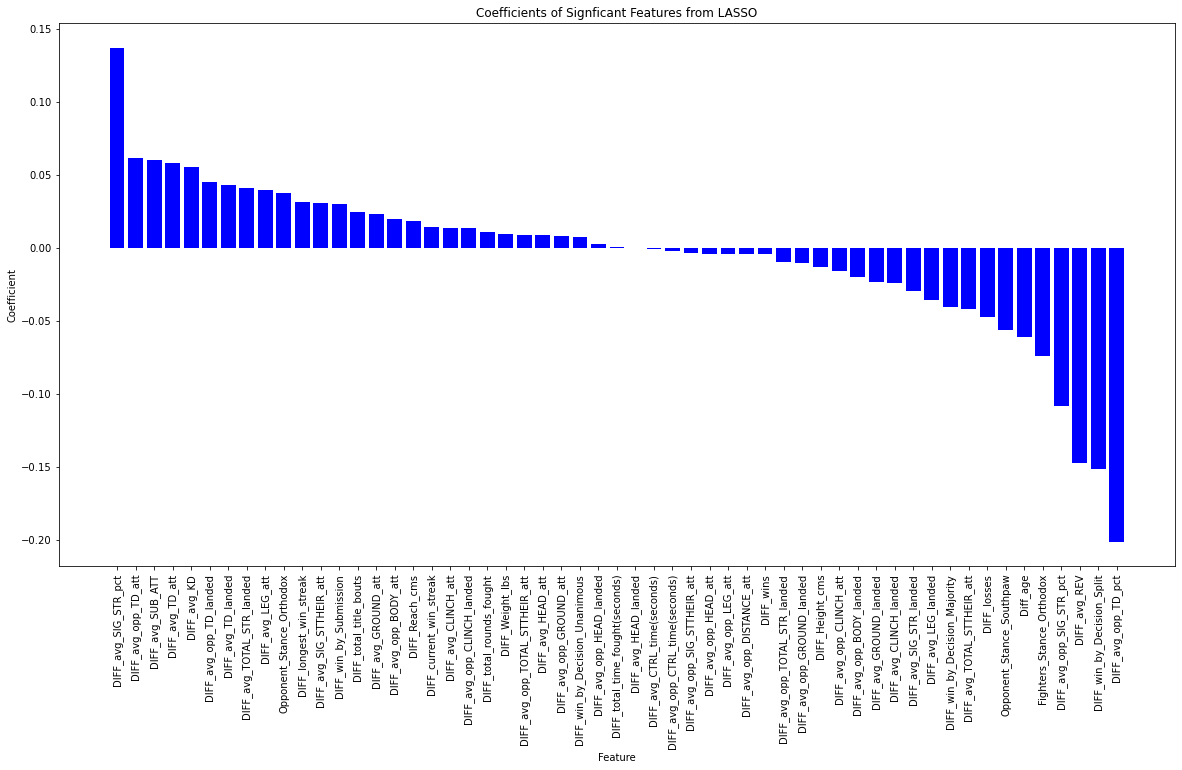

In [31]:
# plot coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.bar('features', 'coefficient', data = coef_df, color = "blue")
plt.xlabel("Feature")
plt.xticks(rotation = 90)
plt.ylabel("Coefficient")
plt.title("Coefficients of Signficant Features from LASSO")
plt.show()

In [32]:
# removing insifnificant features from X
X_train_imp = X_train[coef_df.features]
X_test_imp = X_test[coef_df.features]
X_train_imp.head(3)

,DIFF_avg_SIG_STR_pct,DIFF_avg_opp_TD_att,DIFF_avg_SUB_ATT,DIFF_avg_TD_att,DIFF_avg_KD,DIFF_avg_opp_TD_landed,DIFF_avg_TD_landed,DIFF_avg_TOTAL_STR_landed,DIFF_avg_LEG_att,Opponent_Stance_Orthodox,...,DIFF_win_by_Decision_Majority,DIFF_avg_TOTAL_STTHEIR_att,DIFF_losses,Opponent_Stance_Southpaw,Diff_age,Fighters_Stance_Orthodox,DIFF_avg_opp_SIG_STR_pct,DIFF_avg_REV,DIFF_win_by_Decision_Split,DIFF_avg_opp_TD_pct
5582,0.022656,-1.96875,-0.46875,-1.5625,-0.09375,0.359375,-0.96875,9.421875,12.609375,1,...,0,13.140625,-3,0,-2,1,0.004531,0.375,-1,0.342187
6430,0.175000,-1.00000,0.00000,-0.5000,0.00000,0.000000,-0.50000,131.500000,-4.000000,0,...,0,127.500000,0,1,-6,1,0.410000,0.000,0,0.000000
1448,-0.125000,-0.50000,-2.00000,-3.2500,-1.00000,1.250000,2.25000,69.500000,6.750000,1,...,0,89.250000,2,0,3,0,0.017500,0.000,0,0.875000


In [ ]:
##X_train_imp.to_csv('LGRimpFeaturesOnlyUFC.csv')

In [35]:
# Rerunning Logistic Regression with reduced feature set
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train_imp,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [36]:

print('Train R2:',logr.score(X_train_imp,y_train).round(2))
print('Test R2:',logr.score(X_test_imp,y_test).round(2))

Train R2: 0.61
Test R2: 0.6


## PCA Feature Selection

In [40]:
def biplot(X,n_comp,j1,j2,scale=1,alpha=0.25,s=50):
    
    import numpy as np
    import pandas as pd
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt

    #X = (X-X.mean())/X.std()
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    cols = ['PC-'+str(i+1) for i in range(n_comp)]
    Z = pca.transform(X)
    Z = pd.DataFrame(Z,columns=cols)
    Z.plot.scatter(x=j1-1,y=j2-1,
                   alpha=alpha,
                   s=s,
                   figsize=(10,10))
    sd = np.sqrt(pca.explained_variance_)
    Zj1 = sd[j1-1]*np.array([1,0])
    Zj2 = sd[j2-1]*np.array([0,1])
    plt.arrow(0,0,Zj1[0],Zj1[1],head_width=0.1,color='k')
    plt.arrow(0,0,Zj2[0],Zj2[1],head_width=0.1,color='k')

    L = pca.components_
    L = pd.DataFrame(L,index=cols,columns=X.columns)
    for k in range(X.shape[1]):
        x = scale*L.iloc[j1-1,k]
        y = scale*L.iloc[j2-1,k]
        plt.arrow(0,0,x,y,head_width=0.1,color='r')
        plt.text(1.2*x,1.2*y,X.columns[k],color='black')
        plt.xlim([-3,3])
        plt.ylim([-3,3])
        
    PVE = pca.explained_variance_ratio_
    PVE = pd.Series(PVE,index=cols)
    return PVE

PC-1     0.681788
PC-2     0.147209
PC-3     0.115503
PC-4     0.024621
PC-5     0.017150
PC-6     0.002586
PC-7     0.002490
PC-8     0.001359
PC-9     0.001186
PC-10    0.001055
dtype: float64

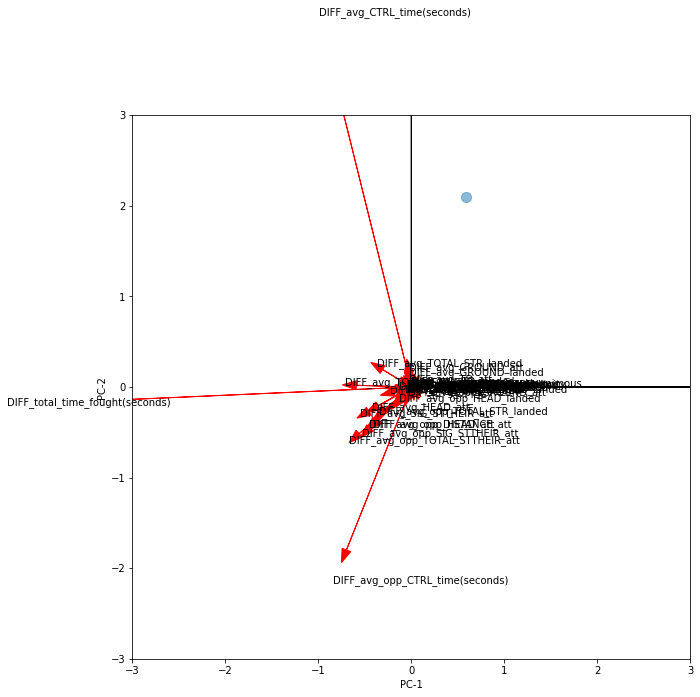

In [41]:
biplot(X_train_imp,10,1,2,scale=4,alpha=.5,s=100)

In [144]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
    
model = PCA(n_components=25).fit(X_train)
X_pc = model.transform(X_train)
print(X_pc)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)

initial_feature_names = X_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df1 = pd.DataFrame(dic.items(), columns =['PC','Label'])
df1

[[ 4.96927937e+01 -1.07539265e+02 -1.34565001e+02 ... -7.50013605e-01
   7.14925772e-01  3.50334985e+00]
 [-1.40318566e+02  1.34520617e+02 -2.22396498e+01 ...  3.76157332e+00
  -1.10989090e+00  6.84942480e+00]
 [-2.95307184e+02 -2.07577521e+02  2.01002254e+02 ... -2.07564218e+00
  -1.36684617e+00 -1.84233488e-01]
 ...
 [-5.06435568e+02 -5.13924346e+00  2.19661672e+02 ...  1.55881375e+00
   1.98354379e+00  3.93068583e-01]
 [ 7.49896009e+02 -1.58078527e+02 -7.02780148e+01 ...  4.23082798e-01
  -1.33900392e+00 -9.06460732e-01]
 [-7.81856208e+01 -1.66230715e+02 -6.60939393e+01 ... -7.25313583e+00
   1.11058473e+00 -1.00869117e+00]]
[48, 46, 47, 48, 16, 15, 17, 22, 49, 49, 37, 25, 38, 42, 63, 64, 26, 38, 63, 28, 65, 62, 18, 51, 35]
['DIFF_total_time_fought(seconds)', 'DIFF_avg_CTRL_time(seconds)', 'DIFF_avg_opp_CTRL_time(seconds)', 'DIFF_total_time_fought(seconds)', 'DIFF_avg_opp_TOTAL_STTHEIR_att', 'DIFF_avg_TOTAL_STR_landed', 'DIFF_avg_opp_TOTAL_STR_landed', 'DIFF_avg_HEAD_att', 'DIFF_tot

,PC,Label
0,PC0,DIFF_total_time_fought(seconds)
1,PC1,DIFF_avg_CTRL_time(seconds)
2,PC2,DIFF_avg_opp_CTRL_time(seconds)
3,PC3,DIFF_total_time_fought(seconds)
4,PC4,DIFF_avg_opp_TOTAL_STTHEIR_att
5,PC5,DIFF_avg_TOTAL_STR_landed
6,PC6,DIFF_avg_opp_TOTAL_STR_landed
7,PC7,DIFF_avg_HEAD_att
8,PC8,DIFF_total_rounds_fought
9,PC9,DIFF_total_rounds_fought


In [148]:
PVE = model.explained_variance_ratio_
PVE = pd.Series(PVE)

PVEtop10 = PVE.sort_values(ascending=False)[:25]
df1['Value'] = PVEtop10
#.plot.barh()
df1

,PC,Label,Value
0,PC0,DIFF_total_time_fought(seconds),0.672196
1,PC1,DIFF_avg_CTRL_time(seconds),0.146478
2,PC2,DIFF_avg_opp_CTRL_time(seconds),0.121472
3,PC3,DIFF_total_time_fought(seconds),0.025268
4,PC4,DIFF_avg_opp_TOTAL_STTHEIR_att,0.018233
5,PC5,DIFF_avg_TOTAL_STR_landed,0.003086
6,PC6,DIFF_avg_opp_TOTAL_STR_landed,0.002554
7,PC7,DIFF_avg_HEAD_att,0.001436
8,PC8,DIFF_total_rounds_fought,0.001381
9,PC9,DIFF_total_rounds_fought,0.001236


<BarContainer object of 25 artists>

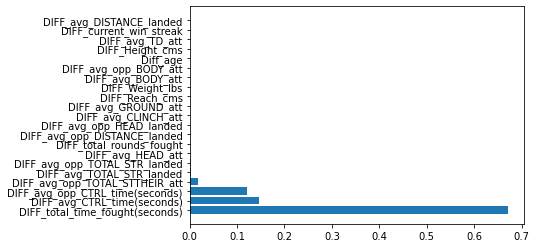

In [149]:
import matplotlib.pyplot as plt
Best10 = pd.Series(df1.Value,df1.Label)
plt.barh(df1.Label, df1.Value)


In [150]:
# removing insifnificant features from X

X_train_imp = X_train[df1.Label]
X_test_imp = X_test[df1.Label]

X_train_imp = X_train_imp.loc[:,~X_train_imp.columns.duplicated()]
X_test_imp = X_test_imp.loc[:,~X_test_imp.columns.duplicated()]

X_train_imp = (X_train_imp - X_train_imp.mean())/X_train_imp.std()
X_test_imp = (X_test_imp - X_test_imp.mean())/X_test_imp.std()


X_train_imp.head(3)

,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_HEAD_att,DIFF_total_rounds_fought,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_opp_HEAD_landed,...,DIFF_avg_GROUND_att,DIFF_Reach_cms,DIFF_Weight_lbs,DIFF_avg_BODY_att,DIFF_avg_opp_BODY_att,Diff_age,DIFF_Height_cms,DIFF_avg_TD_att,DIFF_current_win_streak,DIFF_avg_DISTANCE_landed
5582,-0.204714,-0.494729,-0.403083,0.751780,0.225698,0.259005,0.334728,-0.730871,1.065252,-0.329204,...,-0.534446,0.620124,1.451501,0.155703,1.887789,-0.385707,2.412574,-0.407908,0.436362,1.375047
6430,0.237007,0.864967,-0.032668,0.404993,3.144048,0.843773,-0.054542,-0.118681,-0.025624,-0.153085,...,2.061994,-0.602348,-1.459358,2.092548,-0.104219,-1.154527,-1.201352,-0.131237,-0.414622,-0.020869
1448,0.759943,-0.654981,1.775044,0.475139,1.661901,0.574620,0.117086,0.309853,0.057096,-0.014085,...,-0.131389,-1.213584,-0.974215,-0.173353,0.596267,0.575318,-2.004446,-0.847327,-0.414622,0.128161


In [153]:
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(X_train_imp,y_train)
print('Train R2:',logr.score(X_train_imp,y_train).round(3))
print('Test R2:',logr.score(X_test_imp,y_test).round(3))

Train R2: 0.599
Test R2: 0.58


In [154]:
print(logr.classes_)
logr.coef_

['Draw' 'Loss' 'Win']


array([[-0.02446503,  0.02035565, -0.02500298, -0.06704396,  0.01729532,
         0.13847589,  0.08303204,  0.03297495, -0.0401617 ,  0.01547324,
        -0.00604666, -0.01184089,  0.00265614, -0.03066961, -0.00645092,
         0.01640857, -0.01534756, -0.00641319, -0.01918927, -0.00536072,
        -0.07629598],
       [-0.13576054,  0.06298152,  0.06941461,  0.00896968,  0.11489009,
        -0.00032074,  0.04158633, -0.05518262,  0.10313748,  0.03687937,
        -0.04501849, -0.14251059, -0.0823245 , -0.03457595,  0.06275764,
        -0.022969  ,  0.17993978,  0.04391672, -0.09837921, -0.05391111,
        -0.18891435],
       [ 0.16022557, -0.08333717, -0.04441163,  0.05807429, -0.1321854 ,
        -0.13815515, -0.12461836,  0.02220768, -0.06297579, -0.05235261,
         0.05106515,  0.15435148,  0.07966836,  0.06524555, -0.05630672,
         0.00656042, -0.16459222, -0.03750353,  0.11756848,  0.05927183,
         0.26521033]])

In [155]:
coef_df = pd.DataFrame()
coef_df['Features'] = X_train_imp.columns
coef_df['Coefficients'] = logr.coef_[2]
coef_df = coef_df.sort_values(by=['Coefficients'], ascending = False)
coef_df.head(21)

,Features,Coefficients
20,DIFF_avg_DISTANCE_landed,0.265210
0,DIFF_total_time_fought(seconds),0.160226
11,DIFF_avg_GROUND_att,0.154351
18,DIFF_avg_TD_att,0.117568
12,DIFF_Reach_cms,0.079668
13,DIFF_Weight_lbs,0.065246
19,DIFF_current_win_streak,0.059272
3,DIFF_avg_opp_TOTAL_STTHEIR_att,0.058074
10,DIFF_avg_CLINCH_att,0.051065
7,DIFF_total_rounds_fought,0.022208


## Feature Engineering

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [157]:
poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xe_train = poly.fit_transform(X_train_imp)
Xe_test = poly.fit_transform(X_test_imp)

cols = poly.get_feature_names(X_train_imp.columns)

Xe_train = pd.DataFrame(Xe_train,columns=cols)
Xe_test = pd.DataFrame(Xe_test,columns=cols)

print('             X shape =',X_train_imp.shape)
print('X (engineered) shape =',Xe_train.shape)
Xe_train.head(3)

             X shape = (6224, 21)
X (engineered) shape = (6224, 252)


,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_HEAD_att,DIFF_total_rounds_fought,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_opp_HEAD_landed,...,DIFF_Height_cms^2,DIFF_Height_cms DIFF_avg_TD_att,DIFF_Height_cms DIFF_current_win_streak,DIFF_Height_cms DIFF_avg_DISTANCE_landed,DIFF_avg_TD_att^2,DIFF_avg_TD_att DIFF_current_win_streak,DIFF_avg_TD_att DIFF_avg_DISTANCE_landed,DIFF_current_win_streak^2,DIFF_current_win_streak DIFF_avg_DISTANCE_landed,DIFF_avg_DISTANCE_landed^2
0,-0.204714,-0.494729,-0.403083,0.751780,0.225698,0.259005,0.334728,-0.730871,1.065252,-0.329204,...,5.820514,-0.984108,1.052755,3.317403,0.166389,-0.177996,-0.560893,0.190412,0.600018,1.890754
1,0.237007,0.864967,-0.032668,0.404993,3.144048,0.843773,-0.054542,-0.118681,-0.025624,-0.153085,...,1.443246,0.157661,0.498107,0.025072,0.017223,0.054414,0.002739,0.171912,0.008653,0.000436
2,0.759943,-0.654981,1.775044,0.475139,1.661901,0.574620,0.117086,0.309853,0.057096,-0.014085,...,4.017805,1.698422,0.831088,-0.256891,0.717963,0.351321,-0.108594,0.171912,-0.053138,0.016425


In [158]:
Xe_train = (Xe_train - Xe_train.mean())/Xe_train.std()
Xe_test = (Xe_test - Xe_test.mean())/Xe_test.std()

In [159]:
# add bias column of ones
Xe_train['bias'] = 1
Xe_test['bias'] = 1

Xe_train.head(3)

,DIFF_total_time_fought(seconds),DIFF_avg_CTRL_time(seconds),DIFF_avg_opp_CTRL_time(seconds),DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_TOTAL_STR_landed,DIFF_avg_opp_TOTAL_STR_landed,DIFF_avg_HEAD_att,DIFF_total_rounds_fought,DIFF_avg_opp_DISTANCE_landed,DIFF_avg_opp_HEAD_landed,...,DIFF_Height_cms DIFF_avg_TD_att,DIFF_Height_cms DIFF_current_win_streak,DIFF_Height_cms DIFF_avg_DISTANCE_landed,DIFF_avg_TD_att^2,DIFF_avg_TD_att DIFF_current_win_streak,DIFF_avg_TD_att DIFF_avg_DISTANCE_landed,DIFF_current_win_streak^2,DIFF_current_win_streak DIFF_avg_DISTANCE_landed,DIFF_avg_DISTANCE_landed^2,bias
0,-0.204714,-0.494729,-0.403083,0.751780,0.225698,0.259005,0.334728,-0.730871,1.065252,-0.329204,...,-0.852998,1.049404,3.219580,-0.434168,-0.230351,-0.591724,-0.309784,0.493729,0.423340,1
1,0.237007,0.864967,-0.032668,0.404993,3.144048,0.843773,-0.054542,-0.118681,-0.025624,-0.153085,...,0.277758,0.460812,0.016090,-0.511873,0.001415,-0.002008,-0.316865,-0.037255,-0.474891,1
2,0.759943,-0.654981,1.775044,0.475139,1.661901,0.574620,0.117086,0.309853,0.057096,-0.014085,...,1.803657,0.814171,-0.258264,-0.146837,0.297500,-0.118493,-0.316865,-0.092737,-0.467293,1


In [160]:
# cross-validation
logr = LogisticRegression(fit_intercept=False, max_iter = 10000)
logr.fit(Xe_train, y_train)
poly_train_score = logr.score(Xe_train, y_train)
poly_test_score = logr.score(Xe_test, y_test)
print('Train Score: ', poly_train_score.round(3))
print('Test Score: ', poly_test_score.round(3))

Train Score:  0.604
Test Score:  0.54


### PCA on Poly Features

In [162]:
model = PCA(n_components=25).fit(Xe_train)
Xe_pc = model.transform(Xe_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = Xe_train.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df1e = pd.DataFrame(dic.items(), columns =['PC','Label'])
df1e

,PC,Label
0,PC0,DIFF_avg_opp_TOTAL_STR_landed DIFF_avg_DISTANC...
1,PC1,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL...
2,PC2,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Height_cms
3,PC3,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_total_roun...
4,PC4,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_T...
5,PC5,DIFF_avg_CLINCH_att DIFF_avg_BODY_att
6,PC6,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att
7,PC7,DIFF_avg_opp_TOTAL_STTHEIR_att
8,PC8,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs
9,PC9,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_wi...


In [163]:
PVE = model.explained_variance_ratio_
PVE = pd.Series(PVE)

PVEtop10 = PVE.sort_values(ascending=False)[:25]
df1e['Value'] = PVEtop10
#.plot.barh()
df1e

,PC,Label,Value
0,PC0,DIFF_avg_opp_TOTAL_STR_landed DIFF_avg_DISTANC...,0.126240
1,PC1,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL...,0.058375
2,PC2,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Height_cms,0.051824
3,PC3,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_total_roun...,0.037950
4,PC4,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_T...,0.031668
5,PC5,DIFF_avg_CLINCH_att DIFF_avg_BODY_att,0.028463
6,PC6,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att,0.027655
7,PC7,DIFF_avg_opp_TOTAL_STTHEIR_att,0.026721
8,PC8,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs,0.025079
9,PC9,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_wi...,0.024569


<BarContainer object of 25 artists>

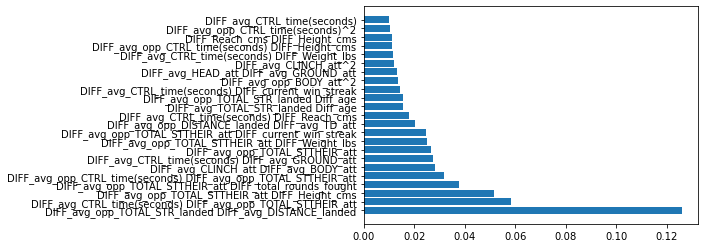

In [165]:
Best10 = pd.Series(df1e.Value,df1e.Label)
plt.barh(df1e.Label, df1e.Value)

In [166]:
# removing insifnificant features from X

Xe_train = Xe_train[df1e.Label]
Xe_test = Xe_test[df1e.Label]

Xe_train = Xe_train.loc[:,~Xe_train.columns.duplicated()]
Xe_test = Xe_test.loc[:,~Xe_test.columns.duplicated()]

Xe_train = (Xe_train - Xe_train.mean())/Xe_train.std()
Xe_test = (Xe_test - Xe_test.mean())/Xe_test.std()


Xe_train.head(3)

,DIFF_avg_opp_TOTAL_STR_landed DIFF_avg_DISTANCE_landed,DIFF_avg_CTRL_time(seconds) DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Height_cms,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_total_rounds_fought,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_CLINCH_att DIFF_avg_BODY_att,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att,DIFF_avg_opp_TOTAL_STTHEIR_att,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_win_streak,...,DIFF_avg_opp_TOTAL_STR_landed Diff_age,DIFF_avg_CTRL_time(seconds) DIFF_current_win_streak,DIFF_avg_opp_BODY_att^2,DIFF_avg_HEAD_att DIFF_avg_GROUND_att,DIFF_avg_CLINCH_att^2,DIFF_avg_CTRL_time(seconds) DIFF_Weight_lbs,DIFF_avg_opp_CTRL_time(seconds) DIFF_Height_cms,DIFF_Reach_cms DIFF_Height_cms,DIFF_avg_opp_CTRL_time(seconds)^2,DIFF_avg_CTRL_time(seconds)
0,-0.068732,-0.426117,1.917121,-0.725079,-0.511744,-0.486036,-0.193777,0.751780,1.199050,0.280707,...,-0.165084,-0.220615,1.277285,-0.261289,0.521680,-0.697758,-0.985984,0.660295,-0.445119,-0.494729
1,-0.379848,0.324061,-0.394909,-0.258516,-0.254889,-1.092027,0.724300,0.404993,-0.571123,-0.175840,...,-1.037896,-0.339596,-0.492688,-0.198454,-0.260609,-1.219897,-0.018353,0.067744,-0.530919,0.864967
2,-0.303888,-0.363048,-0.863144,-0.076792,0.504351,-0.336219,-0.301559,0.475139,-0.436283,-0.202613,...,0.264693,0.185662,-0.320979,-0.106621,-0.370141,0.603464,-3.458840,1.378656,1.143381,-0.654981


In [168]:
logr = LogisticRegression(random_state=0, max_iter=10000)
logr.fit(Xe_train,y_train)
print('Train R2:',logr.score(Xe_train,y_train).round(3))
print('Test R2:',logr.score(Xe_test,y_test).round(3))

Train R2: 0.517
Test R2: 0.539


In [170]:
coef_df = pd.DataFrame()
coef_df['Features'] = Xe_train.columns
coef_df['Coefficients'] = logr.coef_[2]
coef_df = coef_df.sort_values(by=['Coefficients'], ascending = False)
coef_df.head(21)

,Features,Coefficients
17,DIFF_avg_CLINCH_att^2,0.229650
6,DIFF_avg_CTRL_time(seconds) DIFF_avg_GROUND_att,0.152642
21,DIFF_avg_opp_CTRL_time(seconds)^2,0.115354
19,DIFF_avg_opp_CTRL_time(seconds) DIFF_Height_cms,0.095587
13,DIFF_avg_opp_TOTAL_STR_landed Diff_age,0.091826
8,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_Weight_lbs,0.080093
22,DIFF_avg_CTRL_time(seconds),0.049792
10,DIFF_avg_opp_DISTANCE_landed DIFF_avg_TD_att,0.044774
9,DIFF_avg_opp_TOTAL_STTHEIR_att DIFF_current_wi...,0.036648
4,DIFF_avg_opp_CTRL_time(seconds) DIFF_avg_opp_T...,0.027512
